# Problem: Build a simple CNN for CIFAR-10 image classification

## Imports

In [1]:
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import pandas as pd

## Load the dataset

In [2]:
(X_train, y_train), (X_val, y_val) = cifar10.load_data()

A local file was found, but it seems to be incomplete or outdated because the auto file hash does not match the original value of 6d958be074577803d12ecdefd02955f39262c83c16fe9348329d7fe0b5c001ce so we will re-download the data.
170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 3855s 23us/step


# Preprocess the data

## Normalize the pixel values between 0 and 1

X_train = X_train / 255.0
X_val = X_val / 255.0

## Understand the data

## Define the CNN model

In [3]:
model = Sequential()

## First Convolutional Layer

In [4]:
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(MaxPooling2D(2, 2))

C:\Users\Neliswa\anaconda3\envs\tf_env\lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


## Add second Convolutional layer

In [5]:
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))

In [6]:
model.add(Flatten())
model.add(Dense(64, activation='relu'))

In [7]:
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

## Compile the model

In [8]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [9]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2304)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │         147,520 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 167,562 (654.54 KB)

 Trainable params: 167,562 (654.54 KB)

 Non-trainable params: 0 (0.00 B)

## Train the model

In [10]:
history = model.fit(
    X_train,
    y_train,
    validation_data=(X_val, y_val),
    epochs=20,
    batch_size=32,
    verbose=1
)

Epoch 1/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 28s 16ms/step - accuracy: 0.0989 - loss: 2.9964 - val_accuracy: 0.1000 - val_loss: 2.3026
Epoch 2/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 27s 17ms/step - accuracy: 0.0986 - loss: 2.3028 - val_accuracy: 0.1001 - val_loss: 2.3026
Epoch 3/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 37s 24ms/step - accuracy: 0.0991 - loss: 2.3027 - val_accuracy: 0.1000 - val_loss: 2.3027
Epoch 4/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 31s 20ms/step - accuracy: 0.0968 - loss: 2.3028 - val_accuracy: 0.1000 - val_loss: 2.3027
Epoch 5/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 28s 18ms/step - accuracy: 0.0993 - loss: 2.3027 - val_accuracy: 0.1000 - val_loss: 2.3027
Epoch 6/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 28s 18ms/step - accuracy: 0.0967 - loss: 2.3028 - val_accuracy: 0.1000 - val_loss: 2.3027
Epoch 7/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 28s 18ms/step - accuracy: 0.1004 - loss: 2.3027 - val_accuracy: 0.1000 - val_loss: 2.3027
Epoch 8/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 26s 16ms/step - accuracy: 0.0987 -

## Evaluate the performance of the model.

In [11]:
test_loss, test_accuracy = model.evaluate(X_val, y_val, verbose=2)
print(f'The Loss is {test_loss}, and accuracy is {test_accuracy}')

313/313 - 2s - 7ms/step - accuracy: 0.1000 - loss: 2.3027
The Loss is 2.3026950359344482, and accuracy is 0.10000000149011612


## Visualize the performance

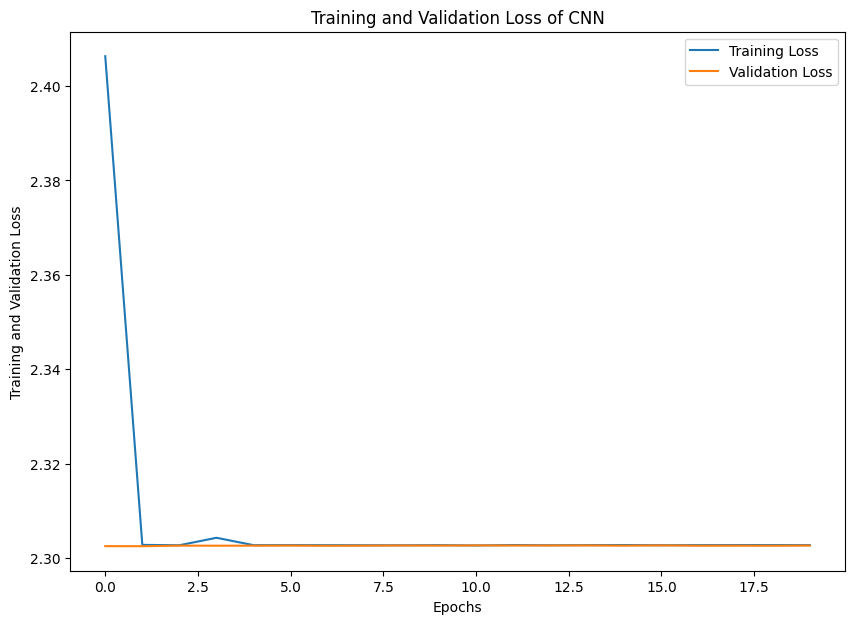

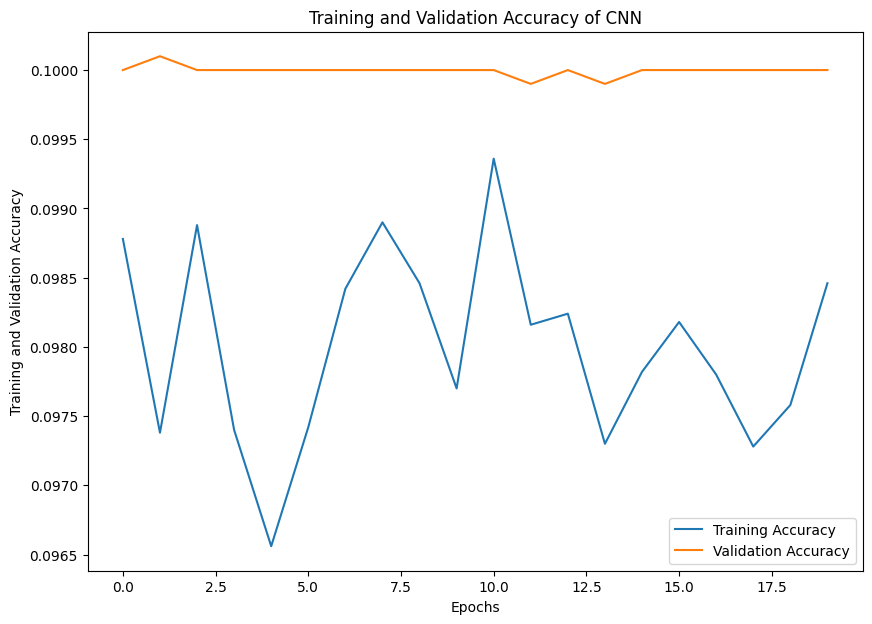

In [12]:
history_df = pd.DataFrame(history.history)

plt.figure(figsize=(10, 7))
plt.plot(history_df['loss'], label='Training Loss')
plt.plot(history_df['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Training and Validation Loss')
plt.title('Training and Validation Loss of CNN')
plt.legend()
plt.show()

plt.figure(figsize=(10, 7))
plt.plot(history_df['accuracy'], label='Training Accuracy')
plt.plot(history_df['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Training and Validation Accuracy')
plt.title('Training and Validation Accuracy of CNN')
plt.legend()
plt.show()

In [13]:
# Output
# The Loss is 0.8811351656913757, and accuracy is 0.6985999941825867